# Importing the modules

In [1]:
# load the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load the datasets

In [2]:
bitcoin_data = pd.read_csv("coin_Bitcoin.csv")
ethereum_data = pd.read_csv("coin_Ethereum.csv")
tron_data = pd.read_csv("coin_Tron.csv")
tether_data = pd.read_csv("coin_Tether.csv")
stellar_data = pd.read_csv("coin_Stellar.csv")
solana_data = pd.read_csv("coin_Solana.csv")
ripple_data = pd.read_csv("coin_Ripple.csv")
litecoin_data = pd.read_csv("coin_Litecoin.csv")
monero_data = pd.read_csv("coin_Monero.csv")

# Problem Statement: 1
Check insights of Bitcoin's closing, opening prices and correlation analysis of the columns.

### checking the first 10 rows of bitcoin

In [3]:
bitcoin_data.head(10)

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   
5    6  Bitcoin    BTC  2013-05-04 23:59:59  115.000000   92.500000   
6    7  Bitcoin    BTC  2013-05-05 23:59:59  118.800003  107.142998   
7    8  Bitcoin    BTC  2013-05-06 23:59:59  124.663002  106.639999   
8    9  Bitcoin    BTC  2013-05-07 23:59:59  113.444000   97.699997   
9   10  Bitcoin    BTC  2013-05-08 23:59:59  115.779999  109.599998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  
5   98.099998  112.500000     0.0  1.250317e+09  
6  112.900002  115.910004     0.0  1.288693e+09  
7  115.980003  112.300003     0.0  1.249023e+09  
8  112.250000  111.500000     0.0  1.240594e+09  
9  109.599998  113.566002     0.0  1.264049e+09

In [4]:
#columns present in the dataset
bitcoin_data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

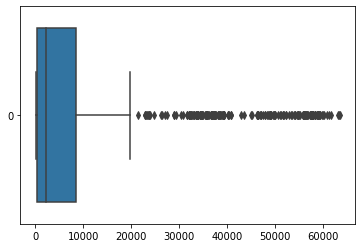

In [5]:
ax = sns.boxplot(data=bitcoin_data['Close'], orient="h")

From the above plot, we can visualize the Bitcoin closing hourly prices. All values over 10000 are outliers (using IQR). 

### Distribution of opening, closing prices of Bitcoin

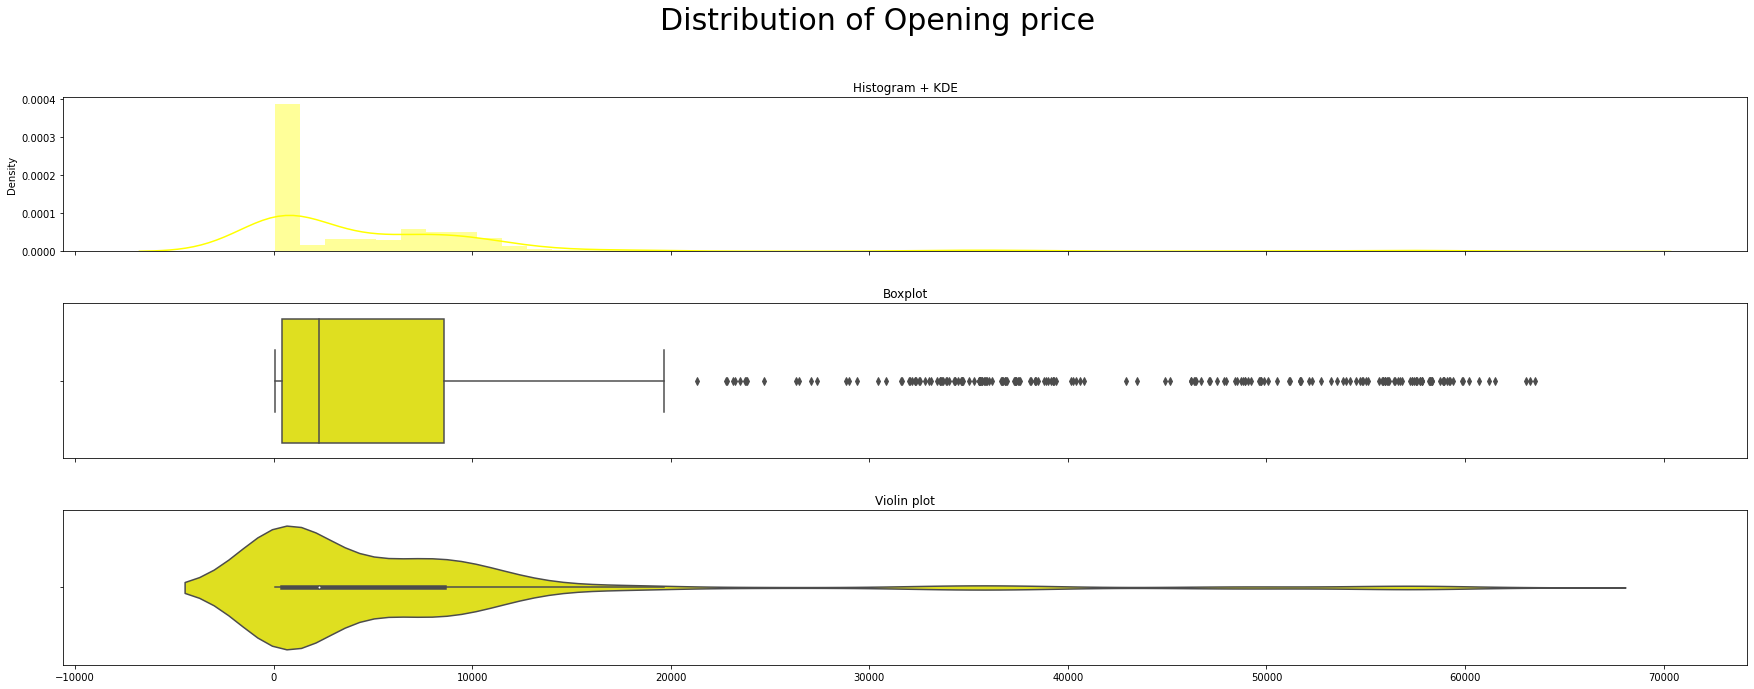

In [6]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(25,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()
    
triple_plot(bitcoin_data['Open'],'Distribution of Opening price', c='yellow')

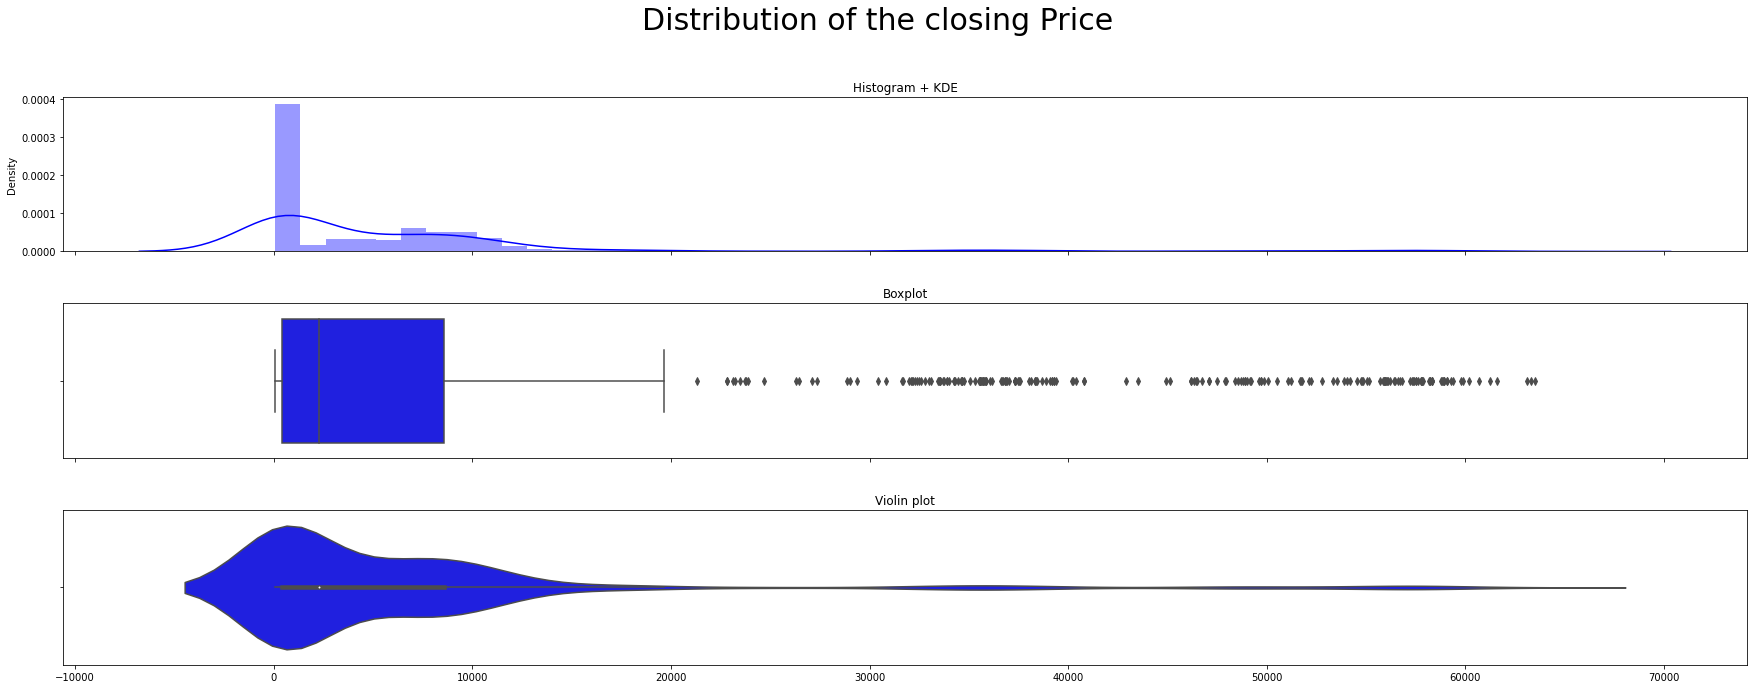

In [7]:
triple_plot(bitcoin_data['Close'],'Distribution of the closing Price',c='blue')

### Correlation Analysis 

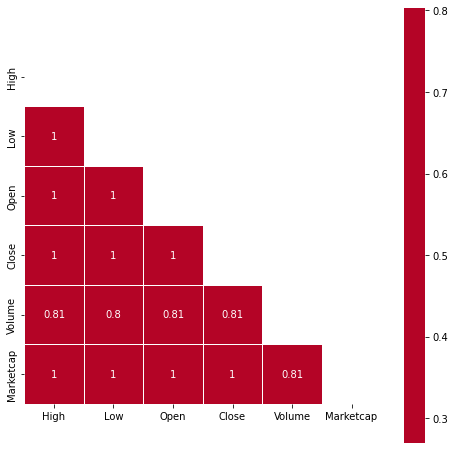

In [8]:
plt.figure(figsize=(8,8))
corr=bitcoin_data[bitcoin_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(bitcoin_data[bitcoin_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

# Problem Statement: 2
Plot Ethereum’s ‘High’ for first 15 and last 10 days.

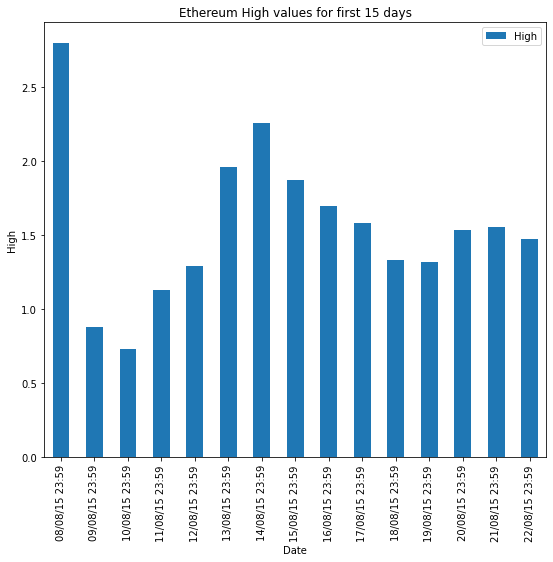

In [9]:
ethereum= ethereum_data.loc[:14]
ethereum.plot(x="Date", y="High", xlabel="Date", ylabel="High", title="Ethereum High values for first 15 days", kind = "bar", figsize=(9, 8))
plt.show()

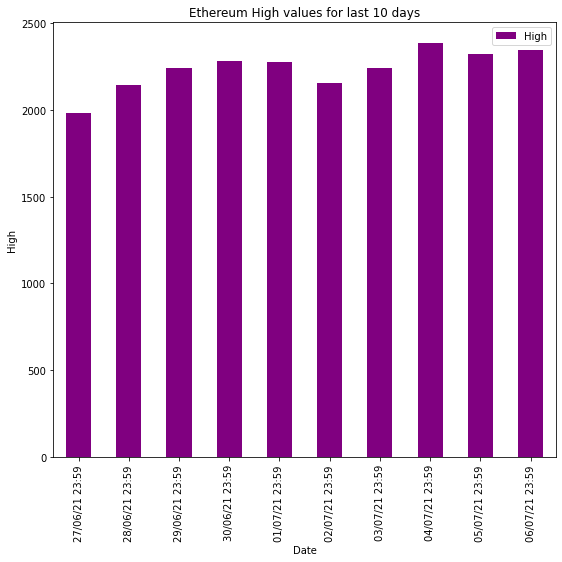

In [10]:
ethereum1= ethereum_data.loc[2150:2159]
ethereum1.plot(x="Date", y="High", xlabel="Date", ylabel="High", title="Ethereum High values for last 10 days", kind = "bar", color='purple', figsize=(9, 8))
plt.show()

# Problem Statement: 3
Plot 5 day Moving/Rolling Average of Volume Traded for every coin in given period:
[01/01/20 – 31/01/20].

## Plot 5 day moving average for Bitcoin

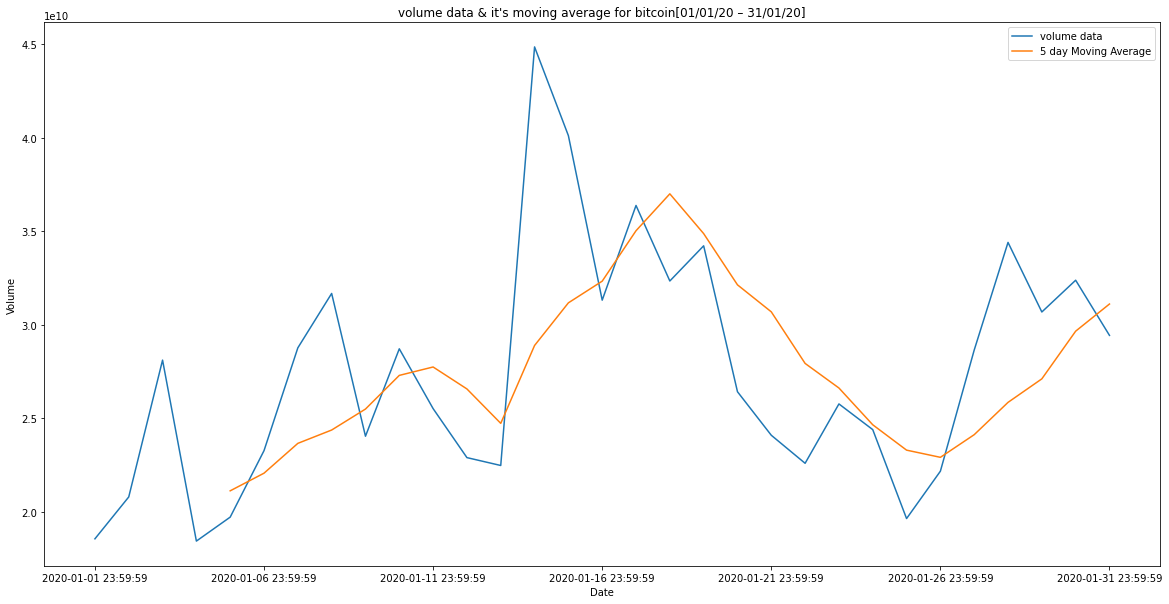

In [11]:
df = bitcoin_data.set_index('Date')
df=pd.read_csv("coin_Bitcoin.csv", index_col="Date")
df_bitcoin = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_bitcoin['Volume'].plot(figsize=(20, 10), label = 'volume data')
df_bitcoin['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
  figsize=(20,10),title = "volume data & it's moving average for bitcoin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

## Plot 5 day moving average for Ethereum

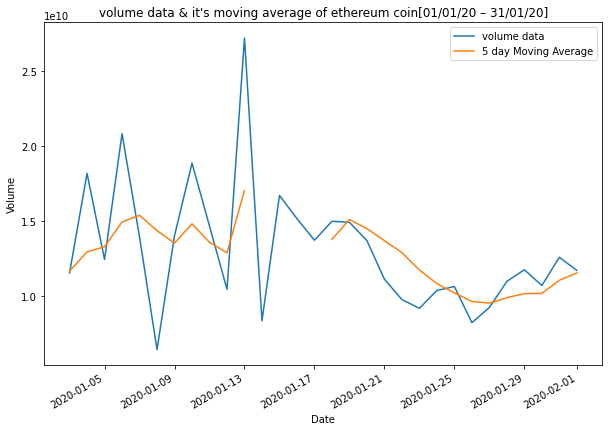

In [12]:
df = ethereum_data.set_index('Date')
df=pd.read_csv("coin_Ethereum.csv", index_col="Date", parse_dates=True)
df_ethereum = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_ethereum['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_ethereum['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
            title = "volume data & it's moving average of ethereum coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

## Plot 5 day moving average for Tron

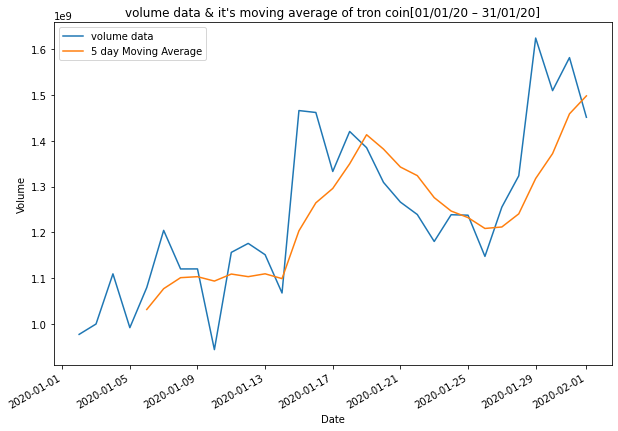

In [13]:
df = tron_data.set_index('Date')
df=pd.read_csv("coin_Tron.csv", index_col="Date", parse_dates=True)
df_tron = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_tron['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_tron['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
            title = "volume data & it's moving average of tron coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

## Plot 5 day moving average for Tether

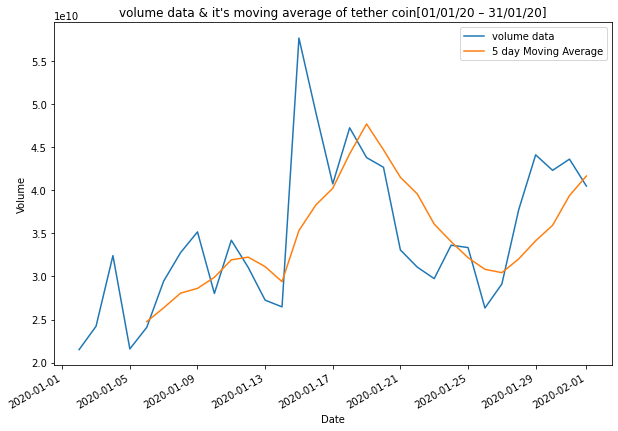

In [14]:
df = tether_data.set_index('Date')
df=pd.read_csv("coin_Tether.csv", index_col="Date", parse_dates=True)
df_tether = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_tether['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_tether['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
    title = "volume data & it's moving average of tether coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

## Plot 5 day moving average for Stellar

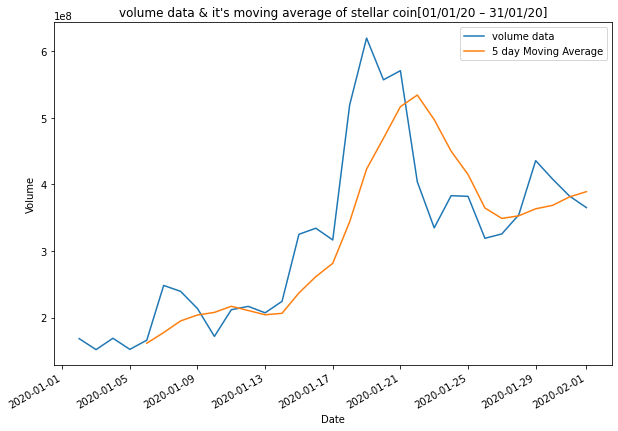

In [15]:
df = stellar_data.set_index('Date')
df=pd.read_csv("coin_Stellar.csv", index_col="Date", parse_dates=True)
df_stellar = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_stellar['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_stellar['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
            title = "volume data & it's moving average of stellar coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

## Plot 5 day moving average for Solana

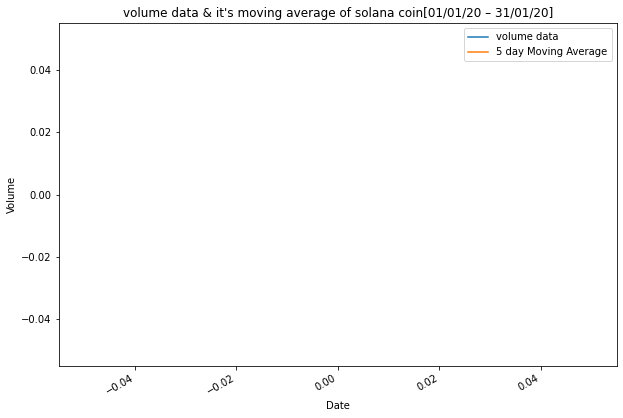

In [16]:
df = solana_data.set_index('Date')
df=pd.read_csv("coin_Solana.csv", index_col="Date", parse_dates=True)
df_solana = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_solana['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_solana['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
            title = "volume data & it's moving average of solana coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

In the above plot, there is no volume data between this time period

## Plot 5 day moving average for Ripple

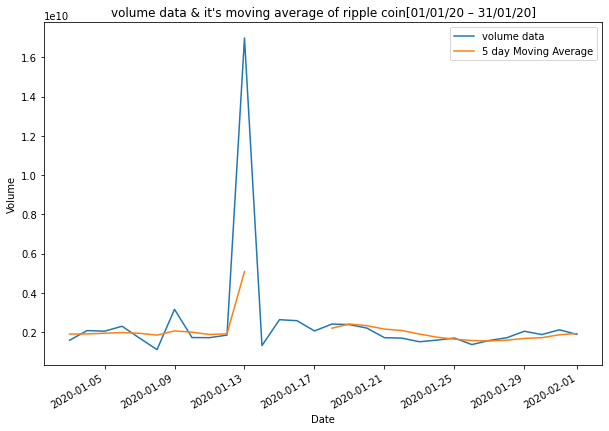

In [17]:
df = ripple_data.set_index('Date')
df=pd.read_csv("coin_Ripple.csv", index_col="Date", parse_dates=True)
df_ripple = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_ripple['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_ripple['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
            title = "volume data & it's moving average of ripple coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

## Plot 5 day moving average for Monero

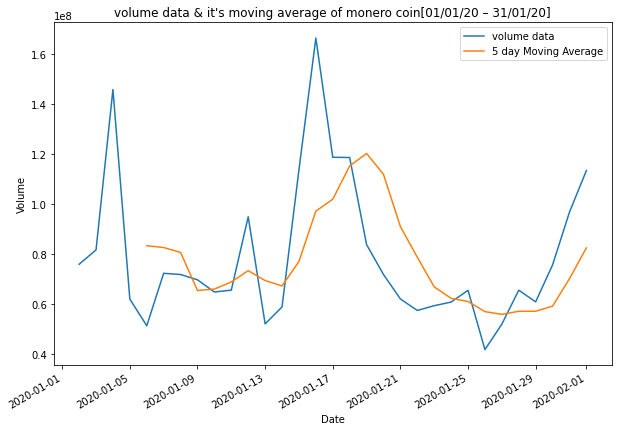

In [18]:
df = monero_data.set_index('Date')
df=pd.read_csv("coin_Monero.csv", index_col="Date", parse_dates=True)
df_monero = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_monero['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_monero['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
                title = "volume data & it's moving average of monero coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

## Plot 5 day moving average for Litecoin

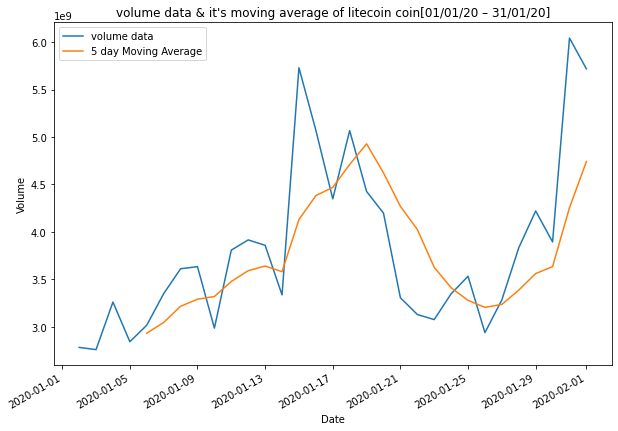

In [19]:
df = litecoin_data.set_index('Date')
df=pd.read_csv("coin_Litecoin.csv", index_col="Date", parse_dates=True)
df_litecoin = df.loc['2020-01-01 23:59:59':'2020-01-31 23:59:59']
df_litecoin['Volume'].plot(figsize=(10, 7), label = 'volume data')
df_litecoin['Volume'].rolling(window=5).mean().plot(xlabel = "Date", ylabel = "Volume",
        title = "volume data & it's moving average of litecoin coin[01/01/20 – 31/01/20]", label = '5 day Moving Average')
plt.legend()
plt.show()

# Problem Statement : 4
Plot candlestick charts for all coins for their respective timeframe provided in dataset

## Bitcoin

In [20]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Bitcoin.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'cyan', decreasing_line_color= 'gray')])
fig.update_layout(title='bitcoin',
    yaxis_title='bitcoin Stock', xaxis_rangeslider_visible=False)

fig.show()

## Ethereum 

In [21]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Ethereum.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'yellow', decreasing_line_color= 'black')])
fig.update_layout(title='ethereum',
    yaxis_title='ethereum Stock', xaxis_rangeslider_visible=False)

fig.show()

## Tron 

In [22]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Tron.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'black', decreasing_line_color= 'gray')])
fig.update_layout(title='tron',
    yaxis_title='tron Stock', xaxis_rangeslider_visible=False)

fig.show()

## Tether 

In [23]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Tether.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'pink', decreasing_line_color= 'purple')])
fig.update_layout(title='tether',
    yaxis_title='tether Stock', xaxis_rangeslider_visible=False)

fig.show()

## Stellar

In [24]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Stellar.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'red', decreasing_line_color= 'gray')])
fig.update_layout(title='stellar',
    yaxis_title='stellar Stock', xaxis_rangeslider_visible=False)

fig.show()

## Solana

In [25]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Solana.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'black', decreasing_line_color= 'blue')])
fig.update_layout(title='solana',
    yaxis_title='solana Stock', xaxis_rangeslider_visible=False)

fig.show()

## Ripple

In [26]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Ripple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'red', decreasing_line_color= 'black')])
fig.update_layout(title='ripple',
    yaxis_title='ripple Stock', xaxis_rangeslider_visible=False)

fig.show()

## Monero 

In [27]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Monero.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'blue', decreasing_line_color= 'green')])
fig.update_layout(title='monero',
    yaxis_title='monero Stock', xaxis_rangeslider_visible=False)

fig.show()

## Litecoin 

In [28]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('coin_Litecoin.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color= 'yellow', decreasing_line_color= 'purple')])
fig.update_layout(title='litecoin',
    yaxis_title='litecoin Stock', xaxis_rangeslider_visible=False)

fig.show()

# Problem Statement: 5
plot Market Cap of Bitcoin, Ethereum, Tron, Tether, Stellar from 01/04/20 to 01/04/21.

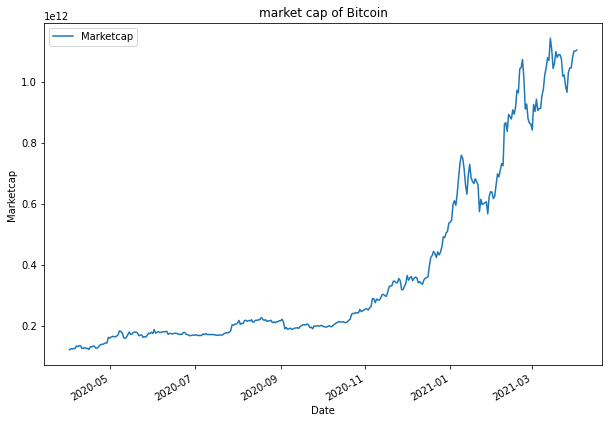

In [29]:
df=bitcoin_data.set_index('Date')
df1 = pd.read_csv("coin_Bitcoin.csv", index_col='Date', parse_dates=True)
df2=df1.loc['2020-04-01 23:59:59':'2021-04-01 23:59:59']
df2.reset_index().plot(x='Date', y='Marketcap', figsize=(10, 7), title='market cap of Bitcoin')
plt.xlabel('Date') 
plt.ylabel('Marketcap')
plt.show()

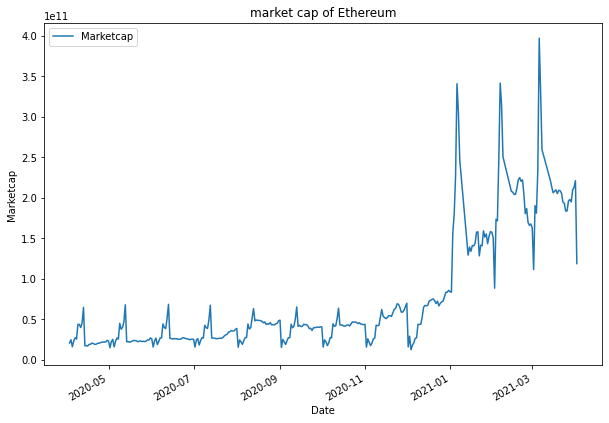

In [30]:
df=ethereum_data.set_index('Date')
df1 = pd.read_csv("coin_Ethereum.csv", index_col='Date', parse_dates=True)
df2=df1.loc['2020-04-01 23:59:59':'2021-04-01 23:59:59']
df2.reset_index().plot(x='Date', y='Marketcap', figsize=(10, 7), title='market cap of Ethereum')
plt.xlabel('Date') 
plt.ylabel('Marketcap')
plt.show()

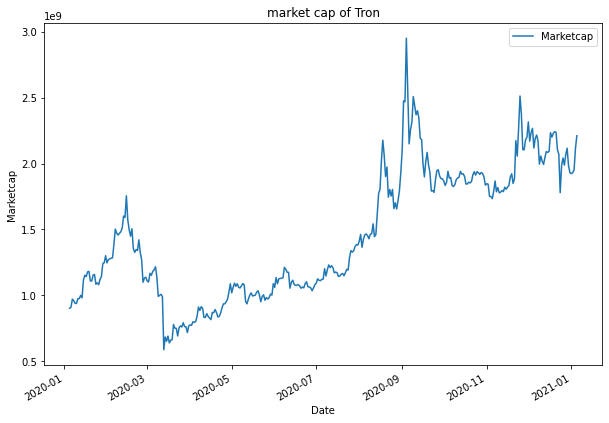

In [31]:
df=tron_data.set_index('Date')
df1 = pd.read_csv("coin_Tron.csv", index_col='Date', parse_dates=True)
df2=df1.loc['01-04-2020 23:59:59':'01-04-2021 23:59:59']
df2.reset_index().plot(x='Date', y='Marketcap', kind='line',figsize=(10, 7), title='market cap of Tron')
plt.xlabel('Date') 
plt.ylabel('Marketcap')
plt.show()

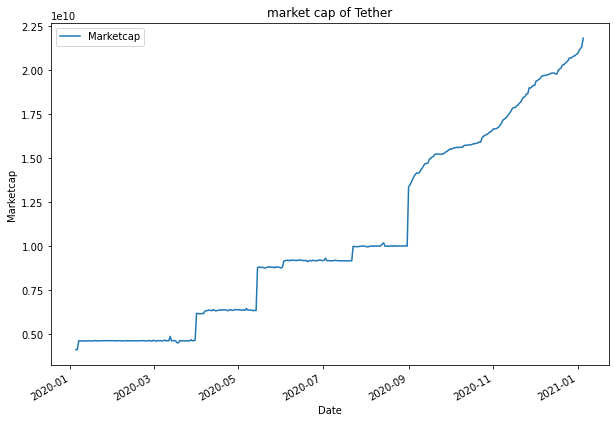

In [32]:
df=tether_data.set_index('Date')
df1 = pd.read_csv("coin_Tether.csv", index_col='Date', parse_dates=True)
df2=df1.loc['01-04-2020 23:59:59':'01-04-2021 23:59:59']
df2.reset_index().plot(x='Date', y='Marketcap',figsize=(10, 7), title='market cap of Tether')
plt.xlabel('Date') 
plt.ylabel('Marketcap')
plt.show()

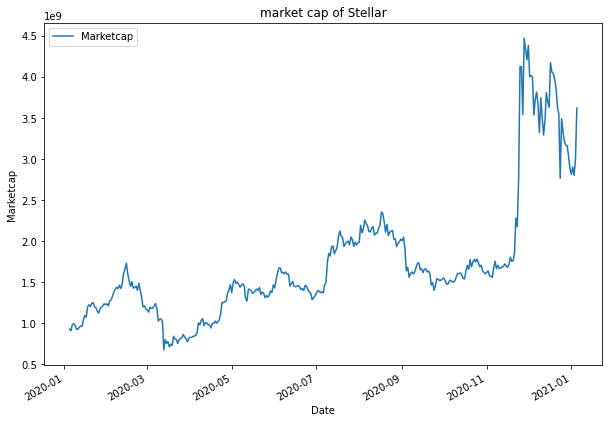

In [33]:
df=stellar_data.set_index('Date')
df1 = pd.read_csv("coin_Stellar.csv", index_col='Date', parse_dates=True)
df2=df1.loc['01-04-2020 23:59:59':'01-04-2021 23:59:59']
df2.reset_index().plot(x='Date', y='Marketcap', kind='line',figsize=(10, 7), title='market cap of Stellar')
plt.xlabel('Date') 
plt.ylabel('Marketcap')
plt.show()

## Problem Statement: 6
Build a scatter plot for ‘Close’ Values of ETH (Ethereum) and BTC (Bitcoin) for years: 2016,17,18 & 19

### ETH(2016, 2017, 2018, 2019)

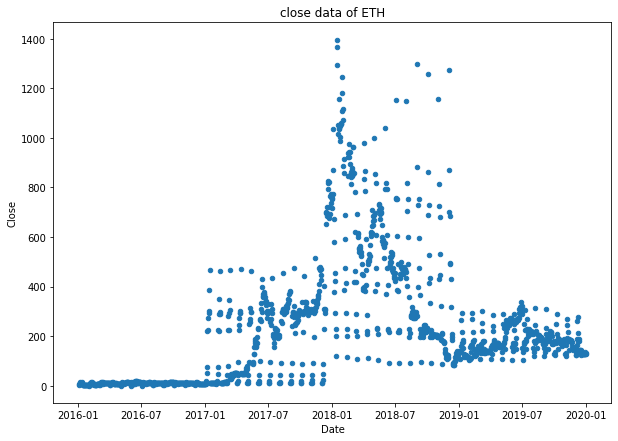

In [34]:
from datetime import datetime
df=ethereum_data.set_index('Date')
df1 = pd.read_csv("coin_Ethereum.csv", index_col='Date', parse_dates=True)
df2=df1.loc['2016-01-01 23:59:59':'2019-12-31 23:59:59']
df2.reset_index().plot.scatter(x='Date', y='Close', figsize=(10, 7), title='close data of ETH')
plt.show()

### BTC(2016,2017,2018,2019)

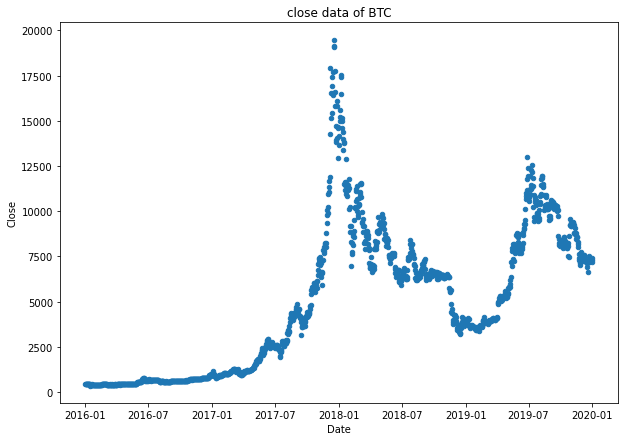

In [35]:
from datetime import datetime
df=bitcoin_data.set_index('Date')
df1 = pd.read_csv("coin_Bitcoin.csv", index_col='Date', parse_dates=True)
df2=df1.loc['2016-01-01 23:59:59':'2019-12-31 23:59:59']
df2.reset_index().plot.scatter(x='Date', y='Close', figsize=(10, 7), title='close data of BTC')
plt.show()

# Thank you!!